## **Question 1**


### **1.a**

One dimentional linear diffusion equation:
$$
{{\partial T}\over{\partial t}} = K{{\partial^2 T}\over{\partial x^2}}
$$

Discretize using first order approximation for the first and second orfer for the second derivative:

$${{T_j^{n+1} - T_j^n}\over{\Delta t}} = K{{T_{j+1}^{n} - 2 T_{j}^{n} + T_{j-1}^{n}}\over{\Delta x^2}}$$

$${{T_j^{n+1} } = {\Delta t}}K{{T_{j+1}^{n} - 2 T_{j}^{n} + T_{j-1}^{n}}\over{\Delta x^2}} +  T_j^n$$

### **1.b**

We are interestied in a stable numerical solution scheme because in Lax equivalance theorem: for a consistent linear method, stability is necessery and sufficient condition for the convergence.

A finite difference numerical scheme for the solution of a linear differential equation is consistent if the truncation error of the scheme approaches zero as the interval $\Delta t \rightarrow 0$. However, the scheme is consistent does not mean it will be convergence. The fact that the distance between the numerical scheme solution of the linear differential equation and the true solution of the same problem approaches zero as $\Delta t \rightarrow 0$

Using a conditionally stable scheme, we need to control the time step dt by using the maximum time step that can be used.


### **1.c**

Using Von Neumann stability analysis for the equation [1]

- The stability of a linear numerical method can be found by considering a single Fourier component and seeing whether it grows in time.
- Replacing $T_j^n \approx T(x_{j}, t^{n})$ with $A^{n} e^{ikj\Delta x}$ in our numerical method, we first obtain an equation for the amplification factor A:

- The von Neumann method requires usually the amplification factor to
be bounded such that  $|A| \le 1$
- The von Neumann stability analysis is a necessary and sufficient
condition for the stability of a linear finite difference equation with
constant coefficient.

### **1.d**

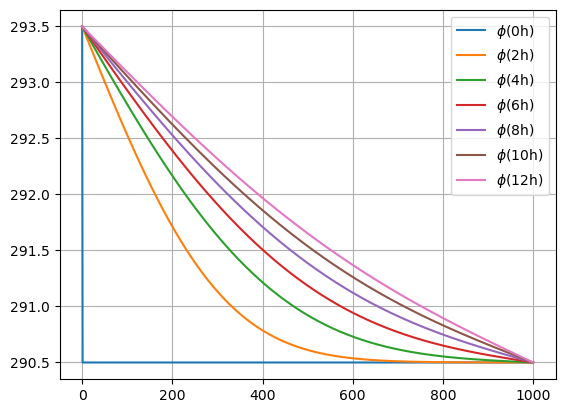

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# func
def func(x):
    if x > .0:
        return 290.5
    else:
        return 293.5

# scheme
def diffusion(x0, y0):
    t = 0; sz = len(x0)
    while t < duration:
        y0 =  c*(np.roll(y0, -1) - 2*y0 + np.roll(y0, 1)) + y0
        y0[0] = dboundary1 # dirichlet boundary
        y0[sz-1] = dboundary2
        if t % tinterval < dt:
            plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t/3600))) + "h)")
        t = t + dt
    plt.legend()
    plt.grid()

# initial condition
k = 4.0; dx = 0.5
dt = 1.0*dx**2/k*0.5 - 0.001 # choose the maximum dt
c = k*dt/dx**2 # auxiliary vars
# NOTE: condition c < 0.5 or 2c < 1

dboundary1 = 293.5 # dirichlet boundary
dboundary2 = 290.5 # dirichlet boundary
x0 = np.arange(0, 1000+dx, dx)
y0 = np.vectorize(func)(x0)
y0[0] = dboundary1; y0[-1] = dboundary2
tinterval = 3600*2; duration = 3600*12 + 10 # time

# run
diffusion(x0, y0)
    

### **1.e**

2 possible scheme:
- implicit scheme (during the course we used the Thomas method) 
- explicit scheme

The possible advantages in using an implicit scheme:
- the implicit scheme is more stable than explicit scheme
- the implicit scheme can use larger time steps
- the implicit scheme can easily integrate the boudary condition, in this problem we use Direchelet condition for T at 0 and T at 1000